<a href="https://colab.research.google.com/github/esragcetnky/Stroke-Prediction/blob/main/Stroke_Prediction_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Connect to Drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Connect Kaggle API

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
# /content/drive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

* let's check working directory

In [ ]:
!pwd

/content


* i wanna create new folder and i want to work inside that folder

In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
# creates new folder
%mkdir Stroke_Prediction

In [ ]:
%cd Stroke_Prediction

/content/drive/My Drive/Stroke_Prediction


In [ ]:
pwd

'/content/drive/My Drive/Stroke_Prediction'

# 2.Import Dataset
* Dataset is from Kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


* data is in zip file we need to unzip and remove to zip file

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
!ls # data is ready, now it is time to import libraries

healthcare-dataset-stroke-data.csv


# 3.Import Libraries

In [11]:
# at first these 3 libraries are enough,
# when trying to build model, i will add other necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# let's read our data
data= pd.read_csv('healthcare-dataset-stroke-data.csv')

# 4.Analyzing and Understanding Dataset

* let's put data to dataframe

In [12]:
dataframe=pd.DataFrame(data)

In [13]:
dataframe.shape

(5110, 12)

* So we have 12 features and 5110 samples in our datasets.
* One of the 12 features is the label

Let's see the names of features

In [14]:
dataframe.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
# let's see the top 5 sample, so we can understand dataset better
dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 5.Visualize Dataset

* visualizing data is really helpful
* it can give better understanding relations between features


Matplotlib library will be used for visualization

First, i wanna check on distributions

In [16]:
plt.style.use('seaborn-darkgrid')

## *Histogram Plot*

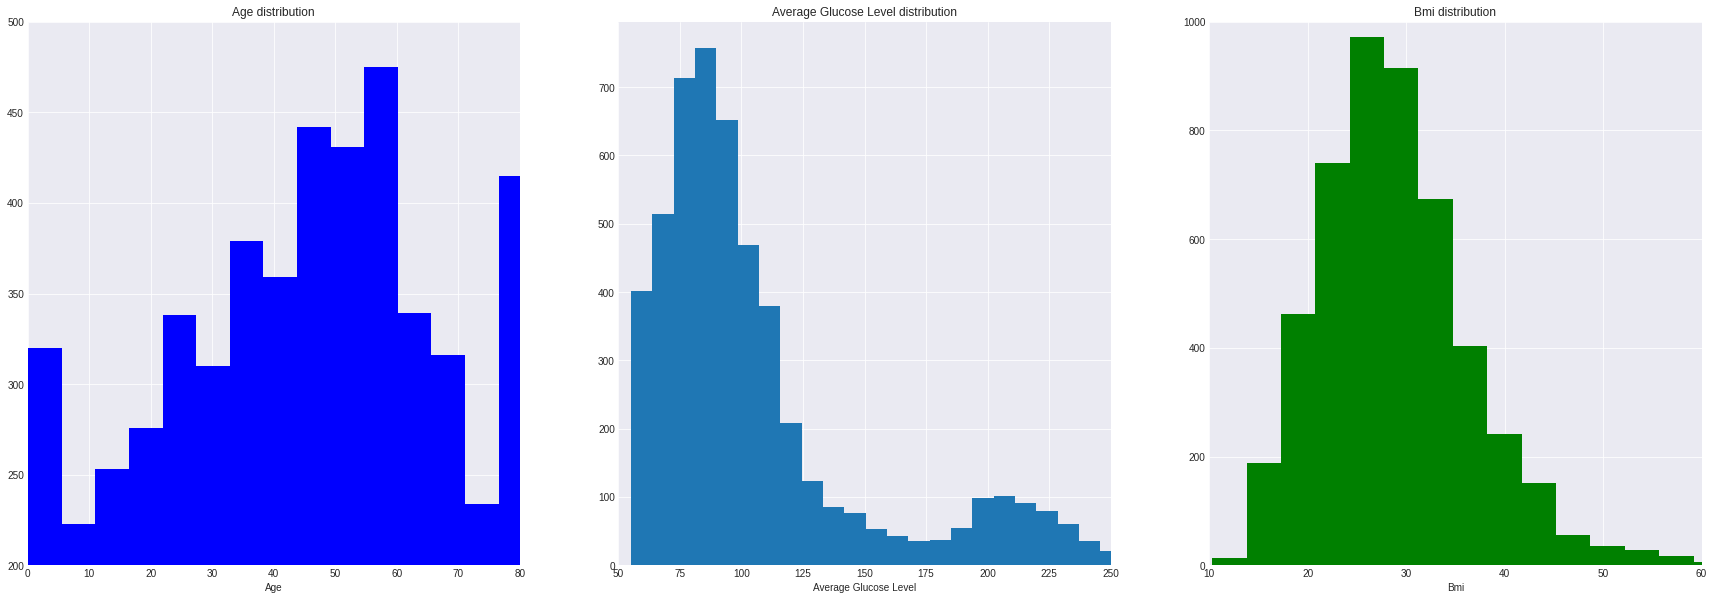

In [17]:
fig, (ax0,ax1,ax2)=plt.subplots(nrows=1,
                                ncols=3,
                                figsize=(30,10))

# AGE DISTRIBUTION 
ax0.hist(dataframe['age'],
         bins=15,
         color='blue')
ax0.set_ylim([200,500])
ax0.set_xlim([0,80])
ax0.set_xlabel('Age')
ax0.set_title('Age distribution')

# AVG GLUCOSE LEVEL DISTRIBUTION
ax1.hist(dataframe['avg_glucose_level'],
         bins=25)
ax1.set_xlabel('Average Glucose Level')
ax1.set_xlim([50,250])
ax1.set_title('Average Glucose Level distribution')

# BMI DISTRIBUTION
ax2.hist(dataframe['bmi'],
         bins=25,
         color='green')
ax2.set_xlabel('Bmi')
ax2.set_ylim([0,1000])
ax2.set_xlim([10,60])
ax2.set_title('Bmi distribution')

fig.show()

## *Pie Chart*

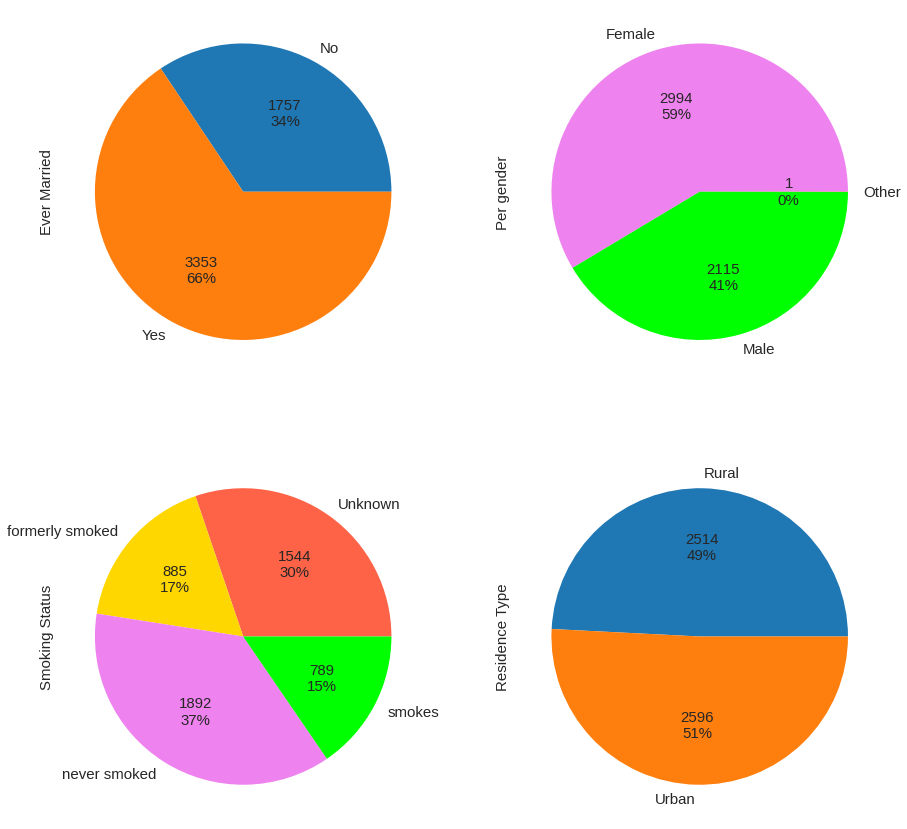

In [18]:
fig, ((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,
                                       ncols=2,
                                       figsize=(15, 15))
def label_function(val):
    return f'{val / 100 * len(dataframe):.0f}\n{val:.0f}%'

# EVER MARRIED
dataframe.groupby('ever_married').size().plot(kind='pie', 
                                              autopct=label_function,
                                              textprops={'fontsize': 15},
                                              ax=ax0)
ax0.set_ylabel('Ever Married',size=15)

# GENDER
dataframe.groupby('gender').size().plot(kind='pie', 
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      colors=['violet', 'lime','tomato'],
                                      ax=ax1)
ax1.set_ylabel('Per gender',size=15)

# SMOKING STATUS
dataframe.groupby('smoking_status').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 colors=['tomato', 'gold','violet','lime'],
                                                 ax=ax2)
ax2.set_ylabel('Smoking Status',size=15)

# RESIDENCE TYPE 
dataframe.groupby('Residence_type').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 ax=ax3)                                         
ax3.set_ylabel('Residence Type',size=15)

# showing the figure
fig.show()

# 6.Split and Formatting Data

## *Creating dummy variables*

* when training model, cant use string values so that is why i am creating dummy variables

In [19]:
# creating dummy variables
def dummy_creation(dataset,dummy_categories):
  for i in dummy_categories:
    dataset_dummy=pd.get_dummies(dataset[i])
    dataset=pd.concat([dataset,dataset_dummy],
                      axis=1)
    dataset=dataset.drop(i,axis=1)
  return dataset

In [20]:
dataframe=dummy_creation(dataframe, ['gender','ever_married','work_type','Residence_type','smoking_status'])

## *Dropping useless columns*


* i dont need id column, so dropped that column

In [21]:
dataframe=dataframe.drop(columns='id')

In [22]:
dataframe

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


* in gender feature, there is one sample with 'Other' value, i think dont need that value so i am gonna delete this sample

In [23]:
dataframe[dataframe['Other']==1]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
3116,26.0,0,0,143.33,22.4,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0


In [24]:
dataframe =dataframe.drop(3116)

* now let's check

In [25]:
dataframe[dataframe['Other']==1]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes


* perfect, now i can drop 'Other' column, i dont need that

In [26]:
dataframe= dataframe.drop(columns='Other')

In [27]:
dataframe.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


## *Checking for null values*

* before split data, i wanna if there are null values

In [29]:
dataframe.isnull().values.any(), dataframe.isnull().sum().sum()

(True, 201)

* looks like there are 201 null values in the dataset, lets look which columns has null value

In [ ]:
count_nan=dataframe.isnull().sum()
print(count_nan)

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
Female                 0
Male                   0
No                     0
Yes                    0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
children               0
Rural                  0
Urban                  0
Unknown                0
formerly smoked        0
never smoked           0
smokes                 0
dtype: int64


In [30]:
dataframe['bmi'].isnull().sum()

201

* I am dropping nan values, now we have 5110-201 sample

In [34]:
dataframe.dropna(subset=['bmi'],
                 inplace=True)

In [36]:
dataframe.isnull().values.any()

False

In [37]:
dataframe.shape

(4908, 21)

## *Heatmap*

* i wanna check on colleration between feature using heatmap

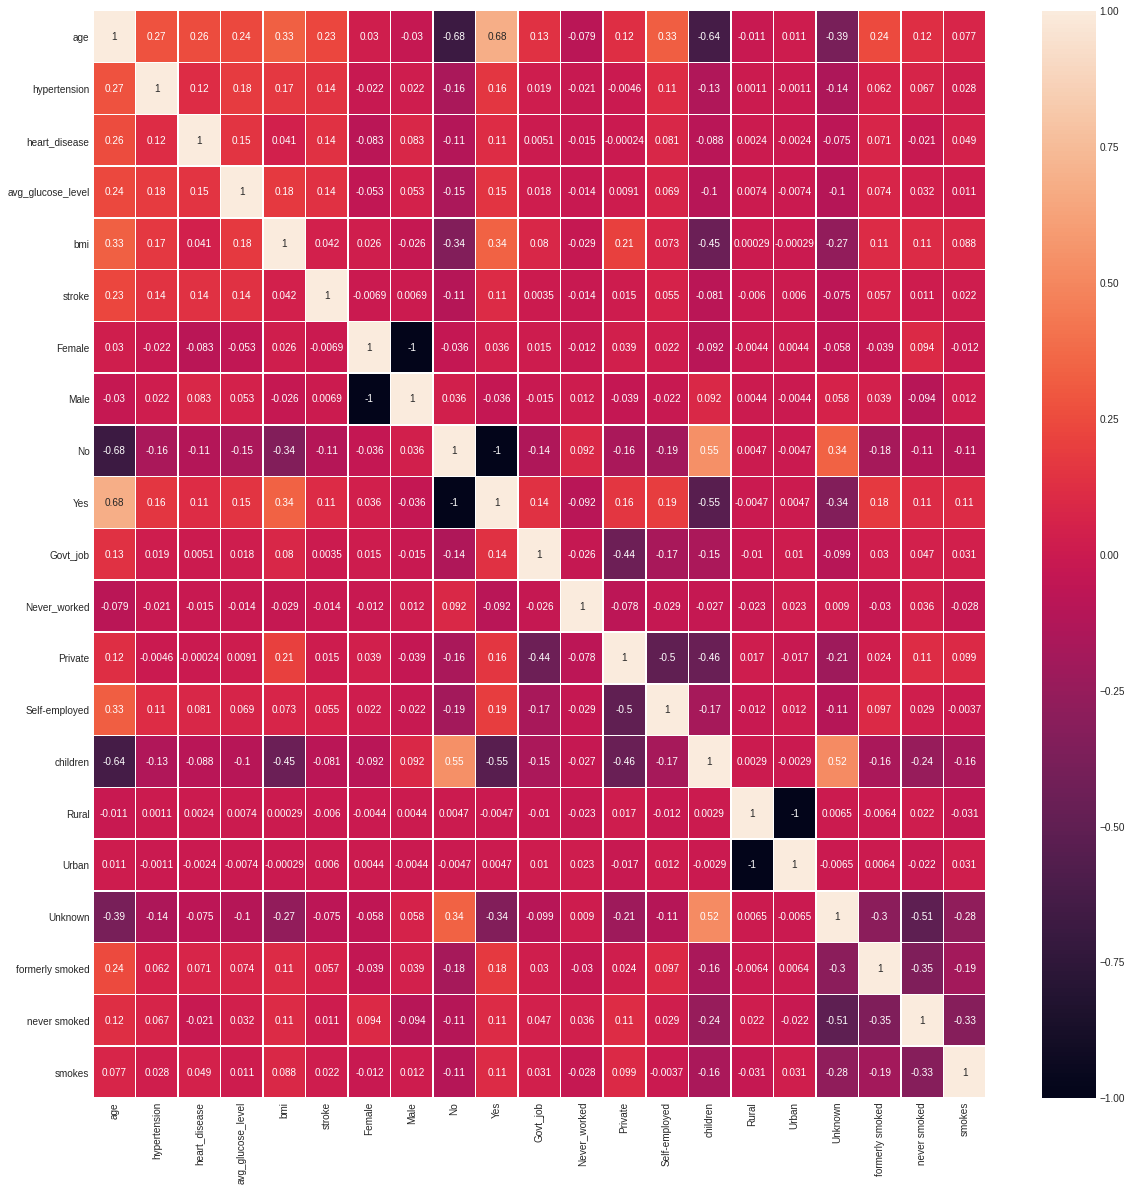

In [44]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(dataframe.corr(),
            annot=True,
            linewidth=.5,
            ax=ax)
fig.show()

## Splitting data as train and test dataset

* first, i will split target and data

In [50]:
y=dataframe['stroke']

In [58]:
y.shape

(4908,)

In [260]:
y[y==1]

0      1
2      1
3      1
4      1
5      1
      ..
243    1
244    1
245    1
246    1
248    1
Name: stroke, Length: 209, dtype: int64

In [51]:
x=dataframe.drop(columns='stroke')

In [59]:
x.columns, x.shape

(Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
        'Female', 'Male', 'No', 'Yes', 'Govt_job', 'Never_worked', 'Private',
        'Self-employed', 'children', 'Rural', 'Urban', 'Unknown',
        'formerly smoked', 'never smoked', 'smokes'],
       dtype='object'), (4908, 20))

* i am going to split dataset using 'train_test_split' from sklearn

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3926, 20), (982, 20), (3926,), (982,))

# 7.Build Model 1

## *Import libraries*

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Softmax,MaxPool2D

## *Creating models*

In [288]:
model=Sequential()

## *Adding Layers*

In [289]:
input_size=x_train.shape[1]
model.add(Dense(units=100,
                activation='relu',              
                input_shape=[input_size,]))

In [290]:
model.add(Dropout(0.2))

In [291]:
model.add(Dense(units=1,
                activation='sigmoid'))

In [292]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 100)               2100      
_________________________________________________________________
dropout_19 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 101       
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


## *Compile Model*

In [293]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

## *Train Model*

In [294]:
model.fit(x_train,
          y_train,
          batch_size=16,
          epochs=100)

Epoch 1/100
246/246 [==============================] - 1s 1ms/step - loss: 0.9010 - accuracy: 0.8984
Epoch 2/100
246/246 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.9129
Epoch 3/100
246/246 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.9317
Epoch 4/100
246/246 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.9443
Epoch 5/100
246/246 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.9322
Epoch 6/100
246/246 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9457
Epoch 7/100
246/246 [==============================] - 0s 1ms/step - loss: 0.1637 - accuracy: 0.9599
Epoch 8/100
246/246 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9550
Epoch 9/100
246/246 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9514
Epoch 10/100
246/246 [==============================] - 0s 1ms/step - loss: 0.1907 - accura

## *Test Model*

In [295]:
y_pred=model.predict(x_test).flatten()

In [296]:
y_pred=np.round(y_pred)

In [297]:
loss_value, accuracy_value= model.evaluate(x_test,y_test)

31/31 [==============================] - 0s 847us/step - loss: 0.1385 - accuracy: 0.9593


In [298]:
print(f'Accuracy of the model: {accuracy_value}')
print(f'Loss of the model: {loss_value}')

Accuracy of the model: 0.9592667818069458
Loss of the model: 0.13851512968540192


In [299]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[942   0]
 [ 40   0]]


## *Saving Model*

In [ ]:
model.save('/content/drive/My Drive/Stroke_Prediction')